In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno    # 누락값 표시
import warnings
import mglearn
warnings.filterwarnings('ignore')  # dnjsld antl

%matplotlib inline

# k-NN

## k-NN Classification

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf =  KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

In [ ]:
f, ax = plt.subplots(1,3, figsize=(10,3), squeeze=True)
for n_neighbors, ax in zip([1,3,9], ax):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neighbors'.format(n_neighbors))
    ax.set_xlabel('class 0')
    ax.set_ylabel('class 1')
ax.legend(loc=3)

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
train_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, train_accuracy, label='train accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

## k-NN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print(reg.predict(X_test))
reg.score(X_test, y_test)

In [ ]:
f, ax= plt.subplots(1,3, figsize=(15,4))
line= np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], ax):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title('{}neighbors train score:{:.2f}, test score:{:.2f}'.format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Value')
    ax.set_ylabel('Target')
ax.legend(['model prediction', 'train data/target', 'test data/target'], loc='best')

# 선형모델

## 회귀의 선형 모델

### 선형 회귀(최소제곱법)

In [ ]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)
lr=LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))   # train score와 test score의 차이가 거의 없다. => 과소적합 
lr.score(X_test, y_test)

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0)
lr=LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))    # train score와 test score의 차이가 심하다. => 과대적합
lr.score(X_test, y_test)

### 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print(ridge.score(X_train, y_train))
ridge.score(X_test, y_test)

In [ ]:
ridge10=Ridge(alpha=10).fit(X_train, y_train)
ridge01=Ridge(alpha=0.1).fit(X_train, y_train)
plt.figure(figsize=(18,8))
plt.plot(ridge10.coef_,'^', label='Ridge alpha=10')
plt.plot(ridge.coef_,'s', label='Ridge alpha=1')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('feature list')
plt.ylabel('feature value')
plt.ylim(-25,25)
plt.hlines(0,0, len(lr.coef_))
plt.legend()

In [ ]:
mglearn.plots.plot_ridge_n_samples()

### 라쏘

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))        
np.sum(lasso.coef_!=0)                  # 104개 중 4개만 사용

In [ ]:
lasso001=Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))        
np.sum(lasso001.coef_!=0)   

## 분류의 선형 모델

### LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
lr= LogisticRegression().fit(X_train, y_train)
print('{:.3f}'.format(logreg.score(X_train, y_train)))
print('{:.3f}'.format(logreg.score(X_test, y_test)))

0.946
0.958


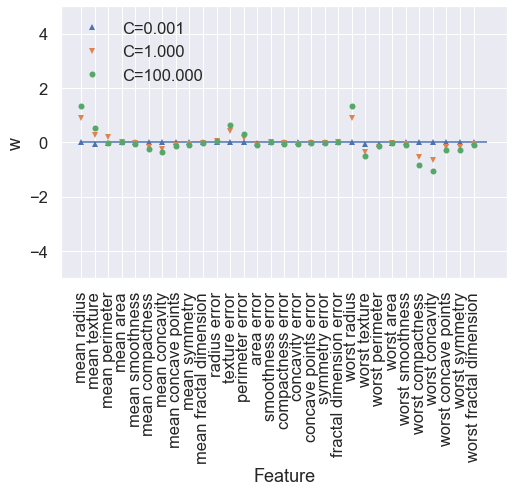

In [32]:

# 특성 별로 계수에 특이성이 있는지 확인하기
plt.figure(figsize=(8,5))
for C, marker in zip([0.001, 1, 100], ['^', 'v', 'o']):
    lr=LogisticRegression(C=C).fit(X_train, y_train)
    plt.plot(lr.coef_.T, marker, label='C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('w')
plt.ylim(-5,5)
plt.legend(loc=2)

### 일대다 방법(one-vs.-rest)

w shape:  (3, 2)
b shape:  (3,)


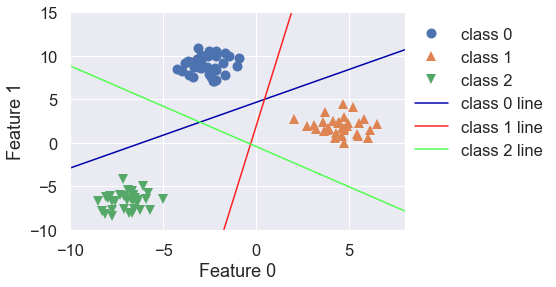

In [55]:
# LinearSVC로 3개의 이진분류기 결정 경계(1차원)

from sklearn.svm import SVC
linear_svc = LinearSVC().fit(X,y)
print('w shape: ', linear_svc.coef_.shape)
print('b shape: ', linear_svc.intercept_.shape)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,10)
for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 line', 'class 1 line', 'class 2 line'], loc=(1.01, 0.3))
plt.show()

# Naive Bayes Classifier

# Decision Tree

<function mglearn.plot_animal_tree.plot_animal_tree(ax=None)>